In [ ]:
#PROJETO UNIDADE3 COMPUTAÇÃO NUMÉRICA

In [ ]:
#Aluno: Daniel Medeiros Soares Carneiro (20220012347)

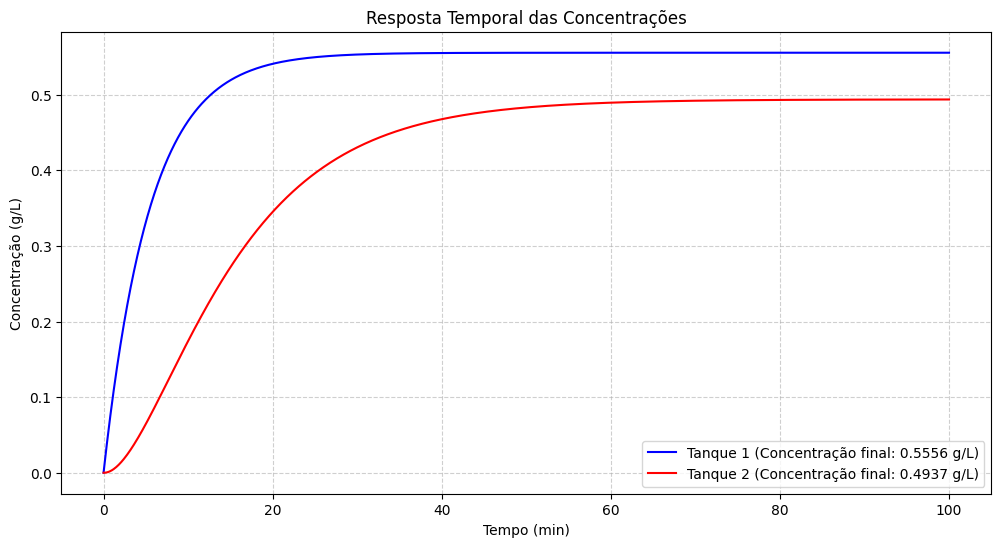

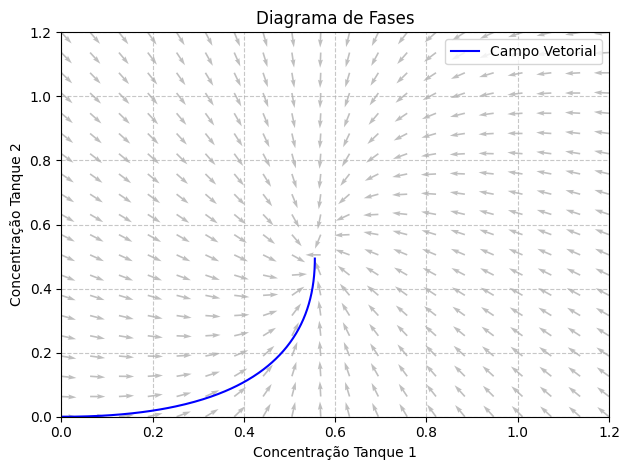

In [33]:
#QUESTÃO 1

import numpy as np
import matplotlib.pyplot as plt


V1 = V2 = 100
Qin = 10
Q12 = 8
Qout = 1
Cin = 1

C1_0 = 0
C2_0 = 0

ti = 0
tf = 100
dt = 0.1
n_passos = int((tf - ti) / dt) + 1


tempo = np.linspace(ti, tf, n_passos)
C1 = np.zeros(n_passos)
C2 = np.zeros(n_passos)
C1[0] = C1_0
C2[0] = C2_0



for i in range(n_passos - 1):

    dC1_dt = (Qin / V1) * (Cin - C1[i]) - (Q12 / V1) * C1[i]
    dC2_dt = (Q12 / V2) * (C1[i] - C2[i]) - (Qout / V2) * C2[i]


    C1[i+1] = C1[i] + dt * dC1_dt
    C2[i+1] = C2[i] + dt * dC2_dt


c1_valores = np.linspace(0, 1.2, 20)
c2_valores = np.linspace(0, 1.2, 20)
C1_grid, C2_grid = np.meshgrid(c1_valores, c2_valores)

# Campo vetorial
dC1 = (Qin / V1) * (Cin - C1_grid) - (Q12 / V1) * C1_grid
dC2 = (Q12 / V2) * (C1_grid - C2_grid) - (Qout / V2) * C2_grid

# Manter as setas com o mesmo tamanho (vetor unitário)
norma = np.sqrt(dC1**2 + dC2**2)
dC1_normalizado = dC1 / norma
dC2_normalizado = dC2 / norma



plt.figure(figsize=(12, 6))
plt.plot(tempo, C1, color="blue", label=f"Tanque 1 (Concentração final: {C1[-1]:.4f} g/L)")
plt.plot(tempo, C2, color="red", label=f"Tanque 2 (Concentração final: {C2[-1]:.4f} g/L)")
plt.xlabel("Tempo (min)")
plt.ylabel("Concentração (g/L)")
plt.title("Resposta Temporal das Concentrações")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



plt.plot(C1, C2, color="blue", label="Campo Vetorial")
plt.quiver(C1_grid, C2_grid, dC1_normalizado, dC2_normalizado, color='grey', alpha=0.5)
plt.xlabel('Concentração Tanque 1')
plt.ylabel('Concentração Tanque 2')
plt.title('Diagrama de Fases')
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#Explicação:

#A evolução temporal das concentrações, partindo de um estado inicial onde ambos os tanques contêm líquido puro (C1(0)=0 e C2(0)=0), demonstra uma clara relação de causa e efeito.
#A concentração no Tanque1 (C1) aumenta rapidamente no início, pois recebe um fluxo direto com soluto, e sua taxa de aumento diminui à medida que se aproxima do equilíbrio. 
#Por sua vez, a concentração no Tanque2 (C2) responde com um atraso, visto que sua alimentação provém do Tanque 1. 
#Com o tempo, ambas as concentrações se estabilizam e se aproximam de valores constantes, indicando que o sistema atingiu um estado estacionário. 
#Ao final da simulação, os valores de equilíbrio são de aproximadamente 0.5556 g/L para o Tanque1 e 0.4937 g/L para o Tanque2. 
#Este equilíbrio é alcançado quando as taxas de entrada e saída de soluto em cada tanque se anulam, um resultado confirmado tanto numericamente pela simulação quanto 
#analiticamente ao resolver as equações diferenciais do sistema para dC1/dt=0 e dC2/dt=0.

#O diagrama de fases corrobora essa conclusão de estabilidade. Ele representa a trajetória do estado do sistema, definido pelo par de concentrações (C1,C2), 
#e o campo vetorial que rege sua dinâmica. A trajetória, partindo da condição inicial (0,0), move-se em direção ao ponto de equilíbrio. 
#O campo vetorial, ilustrado pelas setas, indica a direção da mudança em qualquer ponto, e todas as setas convergem para o ponto de equilíbrio final. 
#Isso demonstra visualmente que o equilíbrio é um atrator estável, significando que, independentemente das condições iniciais (dentro de um escopo físico razoável), 
#o sistema sempre evoluirá para este estado estacionário específico. Em resumo, a simulação demonstra que o sistema de tanques é estavelmente convergente, 
#atingindo um equilíbrio previsível onde a concentração no segundo tanque segue a do primeiro com um atraso característico.


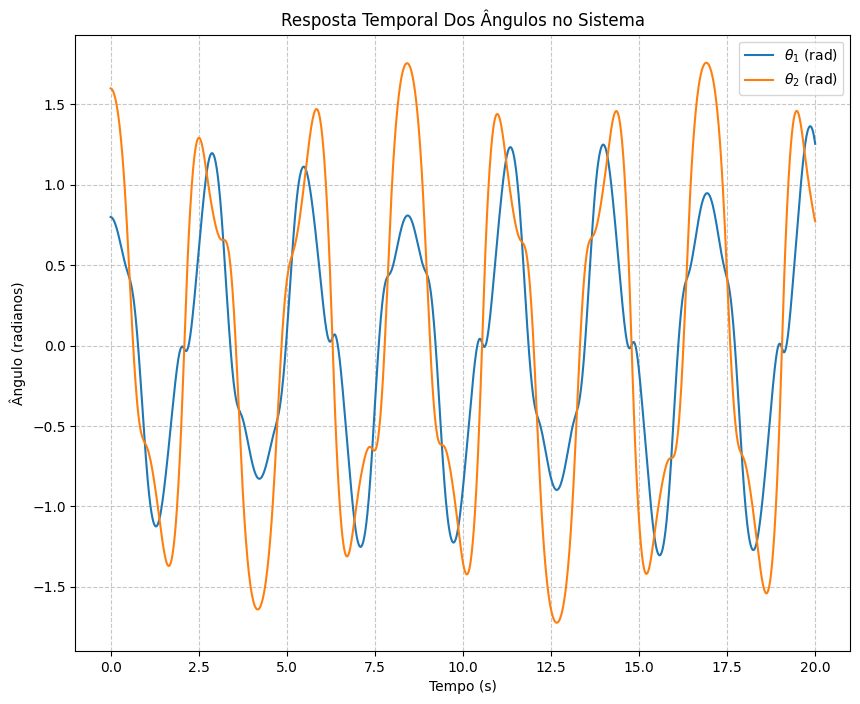

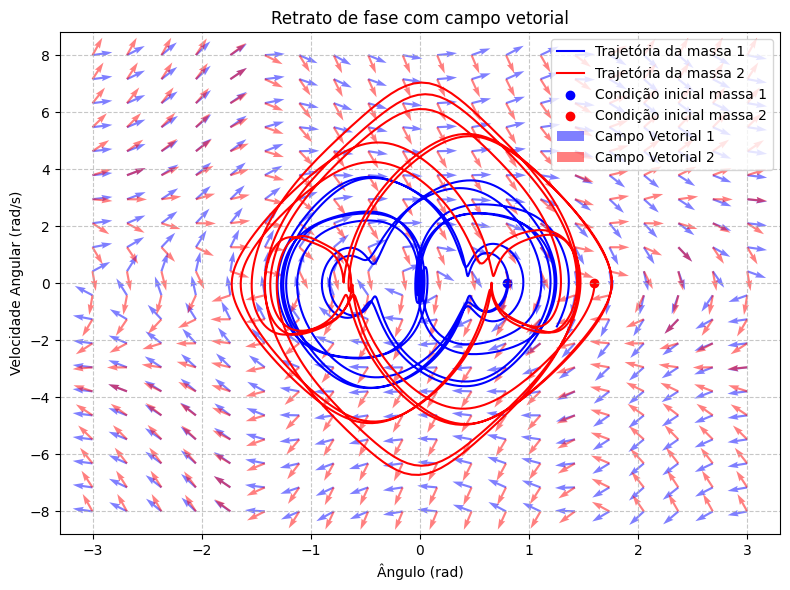

In [ ]:
#QUESTÃO 2

import numpy as np
import matplotlib.pyplot as plt


g = 9.81
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0

theta_1 = 0.8
omega_1 = 0.0
theta_2 = 1.6
omega_2 = 0.0

tempo = 20
dt = 0.01
passos = int(tempo / dt) + 1

t = np.linspace(0, tempo, passos)
th1 = np.zeros(passos)
om1 = np.zeros(passos)
th2 = np.zeros(passos)
om2 = np.zeros(passos)

th1[0] = theta_1
om1[0] = omega_1
th2[0] = theta_2
om2[0] = omega_2

for n in range(passos - 1):
    
    angulo_pendulo1 = (-g * (2 * m1 + m2) * np.sin(th1[n]) - m2 * g * np.sin(th1[n] - 2 * th2[n]) - 2 * np.sin(th1[n] - th2[n]) * m2 * (om2[n]**2 * l2 + om1[n]**2 * l1 * np.cos(th1[n] - th2[n]))) / (l1 * (2 * m1 + m2 - m2 * np.cos(2 * th1[n] - 2 * th2[n])))

    angulo_pendulo2 = (2 * np.sin(th1[n] - th2[n]) * (om1[n]**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1[n]) + om2[n]**2 * l2 * m2 * np.cos(th1[n] - th2[n]))) / (l2 * (2 * m1 + m2 - m2 * np.cos(2 * th1[n] - 2 * th2[n])))

    om1[n + 1] = om1[n] + dt * angulo_pendulo1
    th1[n + 1] = th1[n] + dt * om1[n + 1]

    om2[n + 1] = om2[n] + dt * angulo_pendulo2
    th2[n + 1] = th2[n] + dt * om2[n + 1]



plt.figure(figsize=(10, 8))
plt.plot(t, th1, label=r'$\theta_1$ (rad)')
plt.plot(t, th2, label=r'$\theta_2$ (rad)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (radianos)')
plt.title('Resposta Temporal Dos Ângulos no Sistema')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


theta_num = np.linspace(-3, 3, 20)
omega_num = np.linspace(-8, 8, 20)
theta_grid, omega_grid = np.meshgrid(theta_num, omega_num)


theta_2_grid = 1.6
omega_2_grid = 0

ang_pend_1 = (-g * (2 * m1 + m2) * np.sin(theta_grid) - m2 * g * np.sin(theta_grid - 2 * theta_2_grid) - 2 * np.sin(theta_grid - theta_2_grid) * m2 * (omega_2_grid**2 * l2 + omega_grid**2 * l1 * np.cos(theta_grid - theta_2_grid))) / (l1 * (2 * m1 + m2 - m2 * np.cos(2 * theta_grid - 2 * theta_2_grid)))

ang_pend_2 = (2 * np.sin(theta_grid - theta_2_grid) * (omega_grid**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta_grid) + omega_2_grid**2 * l2 * m2 * np.cos(theta_grid - theta_2_grid))) / (l2 * (2 * m1 + m2 - m2 * np.cos(2 * theta_grid - 2 * theta_2_grid)))

mag1 = np.sqrt(omega_grid**2 + ang_pend_1**2)
u1 = omega_grid / mag1
v1 = ang_pend_1 / mag1

mag2 = np.sqrt(omega_grid**2 + ang_pend_2**2)
u2 = omega_grid / mag2
v2 = ang_pend_2 / mag2

plt.figure(figsize=(8, 6))
plt.plot(th1, om1, color="blue", label="Trajetória da massa 1")
plt.plot(th2, om2, color="red", label="Trajetória da massa 2")
plt.scatter(th1[0], om1[0], color='blue', label='Condição inicial massa 1')
plt.scatter(th2[0], om2[0], color='red', label='Condição inicial massa 2')
plt.quiver(theta_grid, omega_grid, u1, v1, alpha=0.5, color="blue", label="Campo Vetorial 1", angles="xy")
plt.quiver(theta_grid, omega_grid, u2, v2, alpha=0.5, color="red", label="Campo Vetorial 2", angles="xy")
plt.xlabel("Ângulo (rad)")
plt.ylabel("Velocidade Angular (rad/s)")
plt.title("Retrato de fase com campo vetorial")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#EXPLICAÇÃO: 

#O primeiro gráfico, a "Resposta Temporal dos Ângulos no Sistema", mostra que o movimento dos pêndulos é aperiódico. 
#Diferente de um pêndulo simples, cujas oscilações são regulares e previsíveis, as trajetórias de θ1 e θ2 nunca se repetem. 
#Observa-se uma troca de energia constante e irregular entre as duas massas, onde uma pode quase parar enquanto a outra oscila com grande amplitude, e vice-versa. 
#Este comportamento é uma consequência direta do acoplamento não-linear entre os pêndulos.

#O segundo gráfico, o "Retrato de Fase com o Campo Vetorial", oferece uma visão mais profunda. No espaço de fase (velocidade angular vs. ângulo), 
#um sistema periódico simples desenharia uma curva fechada. No entanto, para o pêndulo duplo, as trajetórias são curvas abertas e emaranhadas que vagueiam por uma região 
#do espaço sem nunca se fecharem sobre si mesmas. Esta é a assinatura visual de um movimento caótico. 
#As setas do campo vetorial  ilustram o fluxo dinâmico em cada ponto, e a trajetória do sistema segue fielmente essas direções, confirmando a correção da simulação.

#Síntese Final: 
#A análise conjunta do código e dos gráficos leva a uma conclusão central: a simulação demonstra com sucesso que o pêndulo duplo é um sistema não-linear, acoplado e caótico.

#Não-Linearidade: A complexidade do movimento surge das equações que incluem termos não-lineares (como senos de ângulos e velocidades ao quadrado), 
#o que impede uma solução analítica simples.

#Acoplamento: O movimento de cada pêndulo depende intrinsecamente do estado do outro, como evidenciado nas equações onde as variáveis de um pêndulo aparecem nas equações do outro.

#Caos: A característica mais marcante é a extrema sensibilidade às condições iniciais. Embora não testado diretamente na simulação, 
#é um fato conhecido que uma alteração infinitesimal nos ângulos iniciais levaria a uma divergência exponencial das trajetórias ao longo do tempo, 
#tornando a previsão de longo prazo impossível.